<a href="https://colab.research.google.com/github/NaufalDa19/NaufalDa19-Deep-Learning-CNN-Klasifikasi-Keabnormalitasan-Telapak-Kaki/blob/main/Training_Dataset_Flatfoot_CNN_Metode_Resnet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/DATA ALAT PENDETEKSI TELAPAK KAKI'
!ls "/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki"

'DATA ALAT PENDETEKSI TELAPAK KAKI'  'Dataset Flatyfoot'
'Data Flatfoot'			     'Klasifikasi CNN Pendeteksi Telapak Kaki'


In [ ]:
import os
base_dir = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/DATA ALAT PENDETEKSI TELAPAK KAKI'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training normal pictures
train_normal_dir = os.path.join(train_dir, "NORMAL")

# Directory with our training tidak normal pictures
train_abnormal_dir = os.path.join(train_dir, "TIDAK NORMAL")

# Directory with our validation normal pictures
validation_normal_dir = os.path.join(validation_dir, "NORMAL")

# Directory with our validation tidak normal pictures
validation_abnormal_dir = os.path.join(validation_dir, "TIDAK NORMAL")

In [ ]:
train_normal_fnames = os.listdir(train_normal_dir)
print(train_normal_fnames[:5])

train_abnormal_fnames = os.listdir(train_abnormal_dir)
train_abnormal_fnames.sort()
print(train_abnormal_fnames[:5])

['Normal (36).png', 'Normal (1).png', 'Normal (2).png', 'Normal (3).png', 'Normal (4).png']
['Salinan aug_0_1615.png', 'Salinan aug_0_1646.png', 'Salinan aug_0_1670.png', 'Salinan aug_0_1671.png', 'Salinan aug_0_1700.png']


In [ ]:
print('total training normal images : ', len(os.listdir(train_normal_dir)))
print('total training abnormal images : ', len(os.listdir(train_abnormal_dir)))
print('total validation normal images : ', len(os.listdir(validation_normal_dir)))
print('total validation abnormal images : ', len(os.listdir(validation_abnormal_dir)))

total training normal images :  220
total training abnormal images :  232
total validation normal images :  179
total validation abnormal images :  206


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3)
)


234545216/234545216 [==============================] - 2s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(150,150,3))

x = base_model(inputs, training=False)


x = GlobalAveragePooling2D()(x)

x = tf.keras.layers.Flatten()(x)

outputs = Dense(1, activation='sigmoid')(x)


model = Model(inputs=inputs, outputs=outputs)

In [ ]:
base_model.trainable = False


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 58333697 (222.53 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 58331648 (222.52 MB)
________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')


# Flow training images with train_datagen generator and save augmented images to different directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode = 'rgb',
        class_mode='binary'
)

# Flow validation images with val_datagen generator and save augmented images to different directory
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode = 'rgb',
        class_mode='binary'

)


# augmented_dir = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Dataset Flatyfoot/augmented_images/'


# for root, dirs, files in os.walk(train_dir):
#     for dir in dirs:
#         dir_path = os.path.join(root, dir)
#         dest_path = os.path.join(augmented_dir, dir)

#         # Membuat folder tujuan jika belum ada
#         os.makedirs(dest_path, exist_ok=True)

#         # Memuat gambar dari folder sumber dan augmentasi
#         for filename in os.listdir(dir_path):
#             img = load_img(os.path.join(dir_path, filename))
#             x = img_to_array(img)
#             x = x.reshape((1,) + x.shape)

#             # Menghasilkan batch gambar yang telah di-augmentasi
#             i = 0
#             for batch in train_datagen.flow(x, batch_size=10, save_to_dir=dest_path, save_prefix='aug', save_format='png'):
#                 i += 1
#                 if i >= 5:  # Misalnya, menyimpan 5 gambar augmentasi untuk setiap gambar asli
#                     break





# # Save augmented data by class and directory
# for cls in train_generator.class_indices:
#     for dir in ['train', 'validation']:
#         i = 0
#         for batch in train_datagen.flow_from_directory(
#                 os.path.join(train_dir, dir),
#                 target_size=(150, 150),
#                 batch_size=50,
#                 save_to_dir='/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/DATA ALAT PENDETEKSI TELAPAK KAKI/Data Augmentasi/' + dir + '/' + cls,
#                 save_prefix='aug',
#                 save_format='png',
#                 subset=None,
#                 classes=[cls]):
#             i += 1
#             if i > 20:
#                 break




# # Save augmented data
# i = 0
# for batch in train_datagen.flow_from_directory(
#         train_dir,
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=10,
#         save_to_dir='/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/DATA ALAT PENDETEKSI TELAPAK KAKI/Data Augmentasi',
#         save_prefix='aug',
#         save_format='png'):
#     i += 1
#     if i > 20:
#         break


Found 452 images belonging to 2 classes.
Found 385 images belonging to 2 classes.


In [ ]:
import keras as kr
# define the checkpoint
checkpoint_filepath = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/normal-abnormal-{epoch:02d}-{acc:.4f}-{val_acc:.4f}.h5'
model_checkpoint_callback = kr.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=False)

history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=15,
      verbose=1,
      callbacks=[model_checkpoint_callback])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.0153 - acc: 0.5969
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/normal-abnormal-01-0.5969-0.4833.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 387s 19s/step - loss: 1.0153 - acc: 0.5969 - val_loss: 1.7737 - val_acc: 0.4833
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.8022 - acc: 0.6556
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/normal-abnormal-02-0.6556-0.7267.h5
20/20 [==============================] - 266s 14s/step - loss: 0.8022 - acc: 0.6556 - val_loss: 0.6408 - val_acc: 0.7267
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.7419 - acc: 0.6224
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/normal-abnormal-03-0.6224-0.6300.h5
20/20 [==============================] - 263s 13s/step - loss: 0.7419 - acc: 0.6224 - val_loss: 0.8599 - val_acc: 0.6300
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.7526 - acc: 0.6658
Epoch 4: saving model

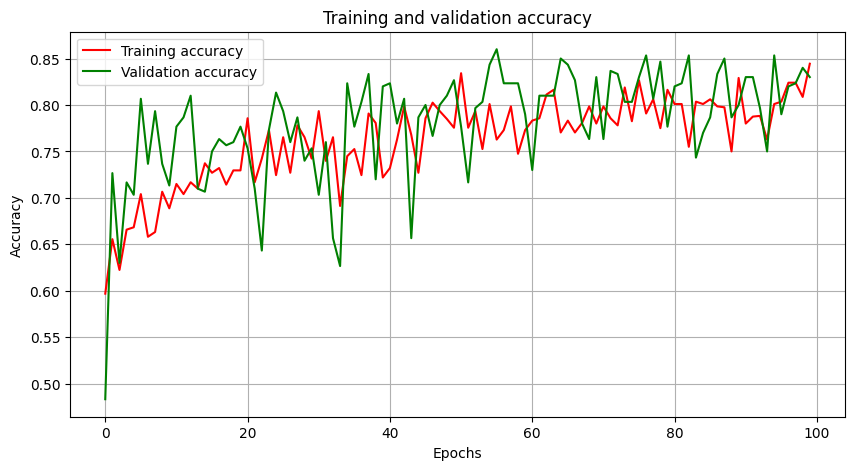

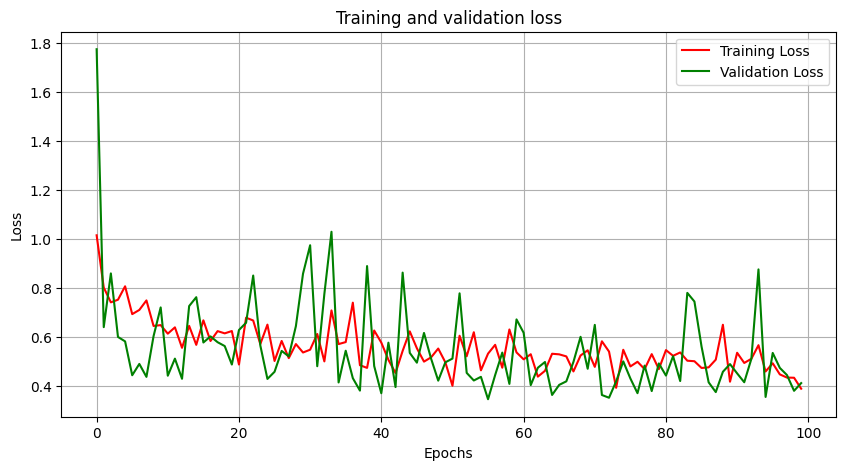

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Setelah pelatihan selesai, muat kembali model terbaik
DIR = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/'
# load model
best_model = load_model(DIR+'normal-abnormal-100-0.8444-0.8300.h5')

# Evaluasi model menggunakan data uji
evaluation = best_model.evaluate(validation_generator, verbose=1)

# Tampilkan hasil evaluasi
print("Loss on test set:", evaluation[0])
print("Accuracy on test set:", evaluation[1])


20/20 [==============================] - 153s 7s/step - loss: 0.3952 - acc: 0.8442
Loss on test set: 0.39518702030181885
Accuracy on test set: 0.8441558480262756


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np


# Setelah pelatihan selesai, muat kembali model terbaik
DIR = '/content/drive/My Drive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/Klasifikasi CNN Pendeteksi Telapak Kaki/'
# load model
best_model = load_model(DIR+'normal-abnormal-100-0.8444-0.8300.h5')

# Load the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset Pendeteksi Telapak Kaki/DATA ALAT PENDETEKSI TELAPAK KAKI/validation/TIDAK NORMAL/Salinan aug_0_5365.png')
img = cv2.resize(img, (150, 150))
img = np.reshape(img, [1, 150, 150, 3])

# Predict the class of the image
prediction = best_model.predict(img,verbose=1)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 3000, 3)
